# Computer Simulations STAT2005
## Felix Chan 
### School of Economics and Finance 

Welcome
------

- Overview of the unit
- Some motivating examples (the fun stuff) 
- Some revisions on basic probability and statistics (it has been a long holidays) 

(Administrative) Overview
-------

- Two hours lecture and two hours workshop (weekly).
- A case study (quick challenge) sometimes in the middle of the semester. 
- A project to be presented by the end of the year. 
- The project has two parts: proposal and final report. 
- No examination (yay!) 


Overview (cont.)
------

- Programming languages R and Python (your choice)
- RStudio/Rmarkdown or Jupyter notebooks (your choice)
- Whenever possible we will cover both R and Python but some workshops will only focus on one or the other. 
- Textbook is based on R but the code can be easily translated into Python

 - It does mean you will need to have some working knowledge on both.
 - RStudio and Anaconda distribtion of Python are recommended. 


- If you are really adventurous then try Macport or Brew on OS X and *aptitude* on Debian Linux (or any other package managers). 

Overview (Teaching staff) 
------

Lecturers: 
    - Felix Chan, School of Economics and Finance 
    - Aloke Phatak, Department of Mathematics and Statistics
    - Ritu Gupa, Department of Mathematics and Statistics 
    - Artur Lugmayr, Faculty of Humanities 

Additional Guest Instructors (Workshop):
    - Andrew Rohl
    - Artur Lugmayr 

Motivation
---------
- This unit introduces some basic concepts and techniques in Computer Simulations
- why? 

- Powerful computers at low cost means computation is now "cheap"
- This allows us to visualise complex systems in specific cases very efficiently. 

<img src="./pics/humancomputer.jpg" height=200 width=700>

Example 1 (Logistic map)
--------

Consider the following difference equation: 

$$ y_t = Ay_{t-1} \left ( 1- y_{t-1} \right )$$

where $A \in (0,4]$ and $y_t \in [0,1]$ for all $t$. 

We usually concern with the behaviour of $y_t$ when $t$ gets large. Two important questions here

1. How does $y_t$ behave with different $A$?
2. How does $y_t$ behave with different initial values ($y_0$)?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation 
import rpy2 as rpy2

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]
plt.rcParams['animation.html'] = 'html5'
%load_ext rpy2.ipython

In [3]:
def our_diff_eq(N,A,y0):
    """
    Simulate the difference equation :math:' y_t = Ay_{t-1} \left ( 1- y_{t-1} \right )'
    Inputs:
        N: int. The number of observations we wish to generate. 
        A: double in (0,4]. The parameter in the difference equation.
        y0: double. The starting point of the difference equation.
    Output:
        y: (N,) numpy array. 
    """
    y = np.zeros(N)
    y[0] = y0
    for t in np.arange(1,N):
        y[t] = A*y[t-1]*(1-y[t-1])
    return y

In [4]:
%%R 
our_diff_eq <- function(N,A,y0) {
    y <- c(y0)
    for (t in 2:N) {
        y[t] <- A*y[t-1]*(1-y[t-1])
    }
    return(y)
}

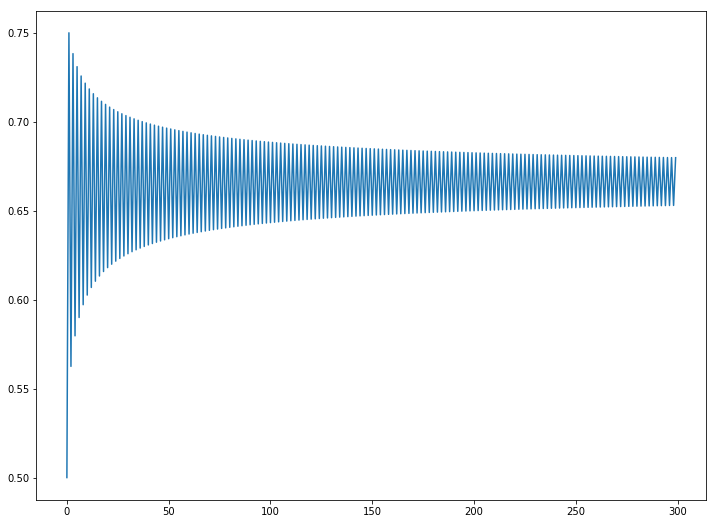

In [5]:
N=300
A = 3
y0 = 0.5
y = our_diff_eq(N,A,y0)
plt.plot(y)

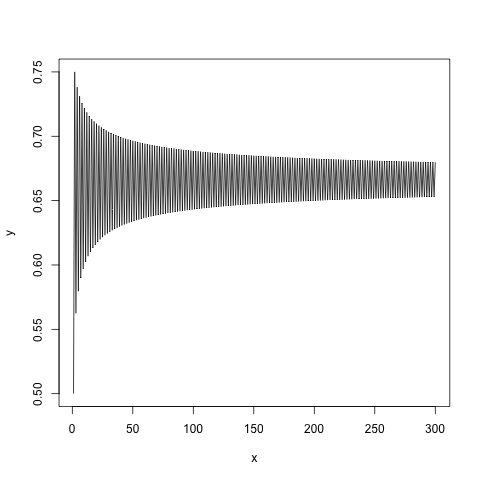

In [6]:
%%R 
N <- 300
A <- 3
y0 <- 0.5
y <- our_diff_eq(N,A,y0)
plot(y,type="l", xlab="x")


Example 1 (Logistic Map Cont.)
---------

- Let's see if we can answer the first question. How does $y_t$ behave with different values of $A$? 
- One way to do this, is to call *our_diff_eq* function over different values of $A$.
- We can then summarise the outputs as an animation. 

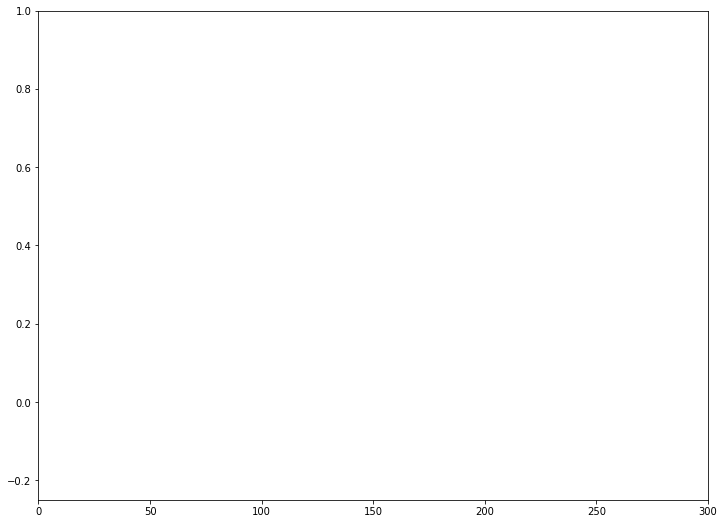

In [71]:
fig, ax = plt.subplots()
ax.set_xlim([0,N])
ax.set_ylim([-0.25,1])
line, = ax.plot([], [])

In [72]:
def anima_diff(i, N, y0): 
    y = our_diff_eq(N,i,y0)
    x = np.arange(0,N)
    line.set_data(x,y)
    ax.set_title('$A$={0}'.format(i))


In [73]:
anima = lambda A: anima_diff(A,N,y0)
Aset = np.arange(0.05,4,0.05)
ani = animation.FuncAnimation(fig,anima,frames=Aset)


In [74]:
ani

Example 1 (Logistic Map Cont.)
----------

- As $A$ approaches 4, $y_t$ becomes more and more erratic!! 
- Note that there is no noise (stochastic component) in the equation. Yet it seems to be generating something that looks "random". 
- Take for example, $A=3.99$ with $N=500$


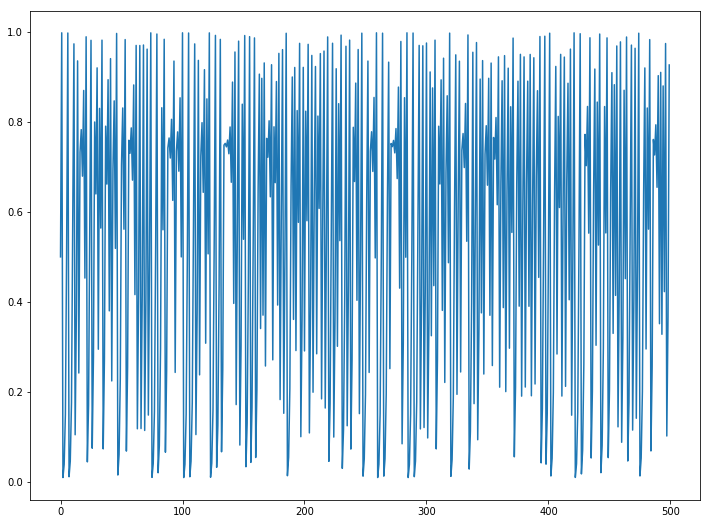

In [76]:
A=3.99
N=500
y = our_diff_eq(N,A,y0)
plt.plot(y)

Example 1. (Logistic Map Cont.)
-----------------

- Now what about the sensitivity of initial values? 
- "Do we always end up in the same place?"
- we can investigate this by repeatedly generating sequences of logistic map with different values of $A$ and different initial values. 
- $N$ needs to be sufficietly large or the changes from one element to the next is very very small. 


In [3]:
def our_diff_eq_limit(N,A,y0,tol_level=1e-6):
    """
    Simulate the difference equation :math:' y_t = Ay_{t-1} \left ( 1- y_{t-1} \right )'
    Inputs:
        N: int. The maximum number of observations we wish to generate. 
        A: double in (0,4]. The parameter in the difference equation.
        y0: double. The starting point of the difference equation.
        tol_level: positive float. Tolerance level. 
    Output:
        y: (N,) numpy array. 
    """
    y = np.zeros(N)
    y[0] = y0
    t=1
    tol=0
    while (tol==0)&(t<N):
        y[t] = A*y[t-1]*(1-y[t-1])
        if abs(y[t]-y[t-1])< tol_level:
            tol = 1
        else:
            t=t+1
    return y[t-1]

In [4]:
N = 5000
y0set = np.arange(0.01,1,0.01)
Aset = np.arange(0.01,4,0.01)
ly = y0set.shape[0]
lA = Aset.shape[0]
bfset = np.zeros(ly*lA)
lAx = np.kron(Aset, np.ones(ly))
for i,A in enumerate(Aset):
    for j,y0 in enumerate(y0set):
        k = i*ly+j
    #    print("working on {0} elements out of {1}".format(k, ly*lA))
        temp = our_diff_eq_limit(N,A,y0)
        bfset[k] = temp

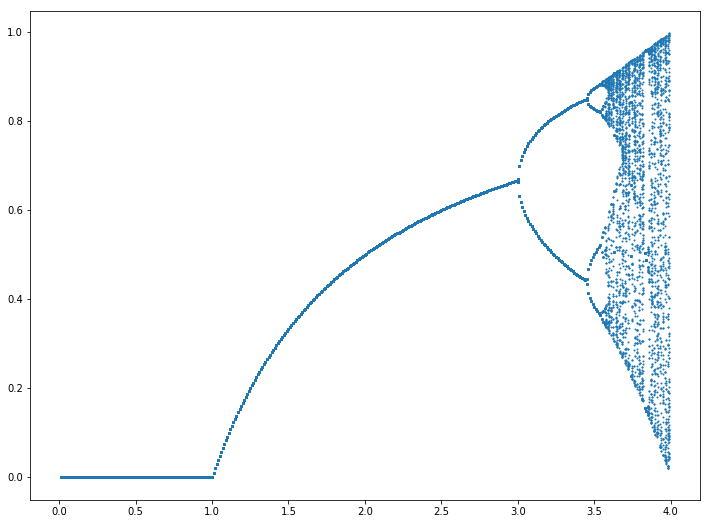

In [5]:
plt.scatter(lAx, bfset, s=1)

Data Visualisation
--------------

- So the simulation is helpful. 
- However, we can do more! 
- All the points were drawn at the same time.
- There may be more information if we can see all the possible values for each $A$ incrementally. 
- In other words, let's make an animation! 

(-0.1, 1)

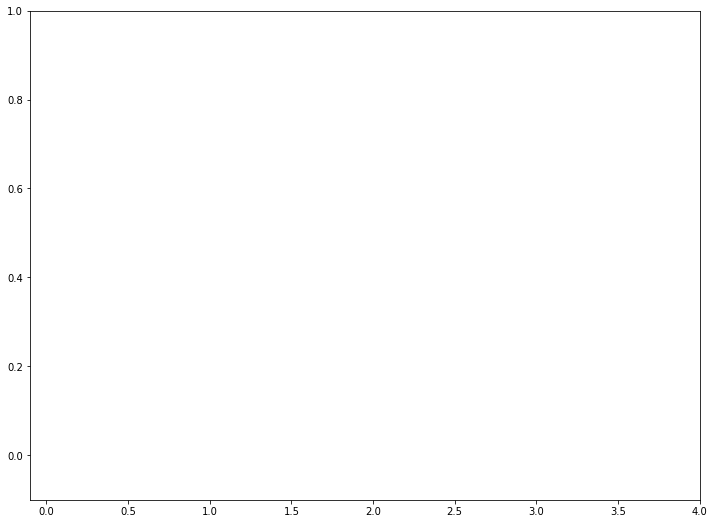

In [17]:
fig, ax = plt.subplots()
ax.set_xlim(-0.1,4)
ax.set_ylim(-0.1,1)

In [18]:
def bf_animfb(i):
    index = (lAx==i)
    if i<1:
        ax.scatter(lAx[index], bfset[index], s=1, c=[0,0,0.5])
    elif (i>=1)&(i<3):
        ax.scatter(lAx[index], bfset[index], s=1, c=[0,0.5,0])
    elif (i>=3)&(i<3.5):
        ax.scatter(lAx[index], bfset[index], s=1, c=[0.5,0,0.5])
    else:
        ax.scatter(lAx[index], bfset[index], s=1, c=[1-i/4.0,1-i/4.0,1-i/4.0])
    ax.set_title('$A={0}$'.format(i))

bf_animb = animation.FuncAnimation(fig, bf_animfb, frames=Aset)

In [19]:
bf_animb

Example 2 (GST Redistribution) 
------------------------

- The example above is completely deterministic. There is no stochastic component. 
- Simulation techniques are even more helpful in studying stochastic processes. 
- Or even just problems involving probabilities. See the Birthday party problem in Workshop. 
- A pratical example is the GST redistribution. 

Example 2 (GST Redistribution)
---------

- Federal government collects Good and Services Tax (GST) and redistribute them back to the states by an equalisation formula. 
- The idea is to ensure that all states have the same fiscal capacity to provide public goods. 
- Australia follows a **Revenue Transfer System** (RTS) which looks a little like this 
$$ \rho_j (t) = \left ( 1- \frac{Y_j(t)}{L_j(t)} \frac{L(t)}{Y(t)} \right ) \frac{Q(t)}{L(t)} $$

where $\rho_j(t)$ is the net transfer (revenue given to the Federal government substracts the redistribution) given to state $j$ at time $t$, $Y_j(t)$ and $Y(t)$ are the outputs of state $j$ and the total outputs of the country at time $t$, respectively. In other words, $\displaystyle Y(t) = \sum_j Y_j(t)$. $L_j(t)$ and $L(t)$ are the population of state $j$ and the total population of the country. $Q(t)$ is the total expenditure of public goods. An important constraint is that $\displaystyle \sum_j \rho_j(t) = 0$ for all $t$. 


Example 2 (GST Redistribution)
---------------------------

$$ \rho_j (t) = \left ( 1- \frac{Y_j(t)}{L_j(t)} \frac{L(t)}{Y(t)} \right ) \frac{Q(t)}{L(t)} $$

- When $Q(t)$ increases, $\rho_j(t)$ increases. 
- If state $j$ outputs per person is growing faster than the country average, then $\rho_j(t)$ decreases. 
- Questions: how should state manage economic growth in such a way that it does not loose out on redistribution? 
- Two problems here: States "games" against each other. So how should each state "plays" this game? Is there a (Nash) equilibrium? 
- State output is uncertain and so is demand of public services. Not knowing the likely value of the net transfer will make budgetting difficult. Both state output and demand of public services can be modelled as stochastic process. 
- In order words, we have a stochastic game! Computer Simulation would be helpful as it is unlikely we are able to solve it analytically. 
- A project for this unit? 

### Limitation

- Simulation result is not a "proof"
- 

## Review of Probability and Statistics

- Mostly come from Jones et al. (Ch. 14 and 15) and STAT1001
- Sets
- Probability  
- Random variables
- Various distriutions 


### Sets

- $\emptyset$ denotes empty set. 
- $\Omega$ is often used to denote a set of all possible outcomes, *sample space*.
- An *event* is any subset of $\Omega$. 
- $A$\ $B = \{x: x\in A \text{ and } x \not \in B\}$ 
- $A\cup B = \{x: x\in A \text{ or } x \in B\}$, the union operator. 
- $A\cap B = \{x: x \in A \text{ and } x \in B\}$, the intersection operator. 
- $\bar{A} = \Omega$\ $A$, the complement of $A$. Sometimes we use $A^c$. 

### Probability axioms

- $\Pr (\Omega) = 1$. 
- $\Pr (A) > 0$. 
- $\Pr \left ( \sum^\infty_{i=1} A_i \right )  = \sum^\infty_{i=1} \Pr (A_i)$ if $A_i$ are disjoint sets, i.e. $A_i \cap A_j =\emptyset$ for $i\neq j$. 



### Some Common Probability Rules
From the axioms we should be able to prove the following (quite easily)
- $\Pr (\emptyset) = 0 $.
- $\Pr \left (\bar{A} \right ) = 1 - \Pr (A)$.
- $\Pr (A) < \Pr (B)$ if $A \subset B$. 
- $\Pr \left (A \cup B \right ) = \Pr (A) + \Pr (B) - \Pr \left ( A \cap B \right )$. 

### Conditional Probability

$$\Pr(A|B) = \frac{\Pr (A \cap B)}{\Pr (B)} $$

- Is the information in knowning $B$ helpful? 
- Independent vs. mutually exclusive 


### Independent 

$$ \begin{align} 
        \Pr (A|B) =& \frac{\Pr (A\cap B)}{\Pr(B)} \\
        =& \Pr (A) \\
        \Pr (A\cap B) =& \Pr (A) \Pr (B) 
        \end{align}
$$

- The second line follows because knowing $B$ does not change the probability of $A$ if they are independent. 
- This is consistent with what we already know. The probability of two indepdent events is the product of their probabilities. 

### Mutually Exclusive 

By definition, if $A$ and $B$ are mutually exclusive then $\Pr (A \cap B) = 0$.
This implies 
    $$\Pr (A|B) = 0$$. 
- Clearly, if $A$ and $B$ cannot happen together then observing $B$ means $A$ cannot happen! 

### Law of total probability 

Let $A_i$ be mutually exclusive and exhaustive events for $i=1,\ldots, k$, i.e. $\displaystyle \cap^k_{i=1} A_i = \Omega$ and $B$ denotes any other event. 
$$\begin{align}
    \Pr (B) =& P \left [ B \cap \left ( \overset{k}{\underset{i=1}{\cup}} A_i \right ) \right ] \\
    =& \sum^k_{i=1} \Pr (B \cap A_i ) \\
    =& \sum^k_{i=1} \Pr (B|A_i)\Pr(A_i)
    \end{align}
    $$